# 220968280 - Anirudh Swaminathan - DSE A2

## Week 6 - Exercise 1 - SVM on pulsar_data.csv

### 1. Import libraries


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn import svm
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
%matplotlib inline

### 2. Import dataset  

In [2]:
df = pd.read_csv('pulsar_data.csv')
df

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
0,121.156250,48.372971,0.375485,-0.013165,3.168896,18.399367,7.449874,65.159298,0.0
1,76.968750,36.175557,0.712898,3.388719,2.399666,17.570997,9.414652,102.722975,0.0
2,130.585938,53.229534,0.133408,-0.297242,2.743311,22.362553,8.508364,74.031324,0.0
3,156.398438,48.865942,-0.215989,-0.171294,17.471572,NaN,2.958066,7.197842,0.0
4,84.804688,36.117659,0.825013,3.274125,2.790134,20.618009,8.405008,76.291128,0.0
...,...,...,...,...,...,...,...,...,...
12523,124.312500,53.179053,-0.012418,-0.556021,7.186455,29.308266,4.531382,21.725143,0.0
12524,115.617188,46.784600,0.218177,0.226757,6.140468,NaN,5.732201,34.357283,0.0
12525,116.031250,43.213846,0.663456,0.433088,0.785117,11.628149,17.055215,312.204325,0.0
12526,135.664062,49.933749,-0.089940,-0.226726,3.859532,21.501505,7.398395,62.334018,0.0


### 3. Explore the data to gain insights about the data

In [3]:
df.shape

(12528, 9)

In [4]:
df.head()

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
0,121.156250,48.372971,0.375485,-0.013165,3.168896,18.399367,7.449874,65.159298,0.0
1,76.968750,36.175557,0.712898,3.388719,2.399666,17.570997,9.414652,102.722975,0.0
2,130.585938,53.229534,0.133408,-0.297242,2.743311,22.362553,8.508364,74.031324,0.0
3,156.398438,48.865942,-0.215989,-0.171294,17.471572,NaN,2.958066,7.197842,0.0
4,84.804688,36.117659,0.825013,3.274125,2.790134,20.618009,8.405008,76.291128,0.0


In [5]:
df.columns

Index([' Mean of the integrated profile',
       ' Standard deviation of the integrated profile',
       ' Excess kurtosis of the integrated profile',
       ' Skewness of the integrated profile', ' Mean of the DM-SNR curve',
       ' Standard deviation of the DM-SNR curve',
       ' Excess kurtosis of the DM-SNR curve', ' Skewness of the DM-SNR curve',
       'target_class'],
      dtype='object')

In [6]:
df.columns = df.columns.str.lstrip()
df.columns

Index(['Mean of the integrated profile',
       'Standard deviation of the integrated profile',
       'Excess kurtosis of the integrated profile',
       'Skewness of the integrated profile', 'Mean of the DM-SNR curve',
       'Standard deviation of the DM-SNR curve',
       'Excess kurtosis of the DM-SNR curve', 'Skewness of the DM-SNR curve',
       'target_class'],
      dtype='object')

In [7]:
df.columns = ['meanip', 'stdip', 'kurtosisip', 'skewnessip', 'meandm', 'stddm', 'kurtosisdm', 'skewnessdm', 'target_class']

<Axes: xlabel='target_class', ylabel='count'>

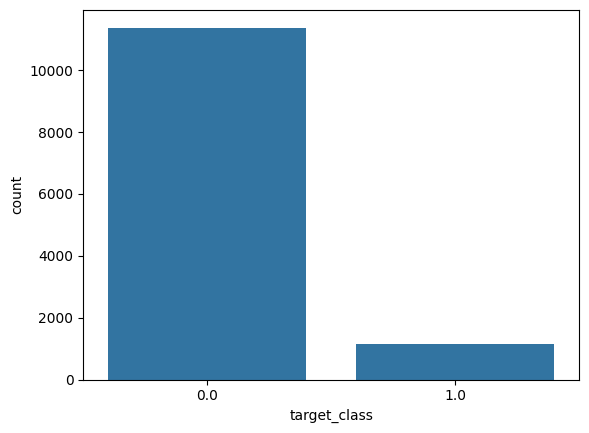

In [8]:
sns.countplot(x='target_class', data=df)

In [9]:
print(df['target_class'].value_counts(normalize=True) * 100)

target_class
0.0    90.796616
1.0     9.203384
Name: proportion, dtype: float64


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12528 entries, 0 to 12527
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   meanip        12528 non-null  float64
 1   stdip         12528 non-null  float64
 2   kurtosisip    10793 non-null  float64
 3   skewnessip    12528 non-null  float64
 4   meandm        12528 non-null  float64
 5   stddm         11350 non-null  float64
 6   kurtosisdm    12528 non-null  float64
 7   skewnessdm    11903 non-null  float64
 8   target_class  12528 non-null  float64
dtypes: float64(9)
memory usage: 881.0 KB


In [11]:
df.isnull().sum()
df = df.dropna()

In [12]:
df.describe()

,meanip,stdip,kurtosisip,skewnessip,meandm,stddm,kurtosisdm,skewnessdm,target_class
count,9273.000000,9273.000000,9273.000000,9273.000000,9273.000000,9273.000000,9273.000000,9273.000000,9273.000000
mean,111.133750,46.514053,0.479546,1.790673,12.735359,26.327860,8.327933,105.783345,0.091664
std,25.686405,6.781320,1.071155,6.286567,29.766782,19.542634,4.549914,108.166669,0.288567
min,6.187500,24.772042,-1.738021,-1.791886,0.213211,7.370432,-2.636857,-1.976976,0.000000
25%,100.984375,42.398382,0.024497,-0.188021,1.910535,14.376641,5.788817,34.917943,0.000000
50%,115.234375,46.895026,0.223858,0.202884,2.797659,18.435186,8.427475,83.151969,0.000000
75%,127.328125,51.001785,0.472066,0.930710,5.459866,28.387019,10.721934,139.770330,0.000000
max,189.734375,91.808628,8.069522,68.101622,211.948997,110.642211,34.539844,1191.000837,1.000000


([0, 1, 2, 3, 4, 5, 6, 7, 8],
 [Text(0, 0, 'meanip'),
  Text(1, 0, 'stdip'),
  Text(2, 0, 'kurtosisip'),
  Text(3, 0, 'skewnessip'),
  Text(4, 0, 'meandm'),
  Text(5, 0, 'stddm'),
  Text(6, 0, 'kurtosisdm'),
  Text(7, 0, 'skewnessdm'),
  Text(8, 0, 'target_class')])

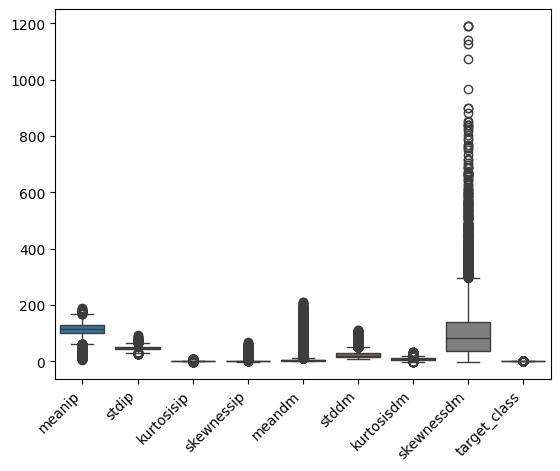

In [13]:
sns.boxplot(data=df)
plt.xticks(rotation=45, ha='right')

### 4. Check the distribution of variables

array([[<Axes: title={'center': 'meanip'}>,
        <Axes: title={'center': 'stdip'}>,
        <Axes: title={'center': 'kurtosisip'}>],
       [<Axes: title={'center': 'skewnessip'}>,
        <Axes: title={'center': 'meandm'}>,
        <Axes: title={'center': 'stddm'}>],
       [<Axes: title={'center': 'kurtosisdm'}>,
        <Axes: title={'center': 'skewnessdm'}>,
        <Axes: title={'center': 'target_class'}>]], dtype=object)

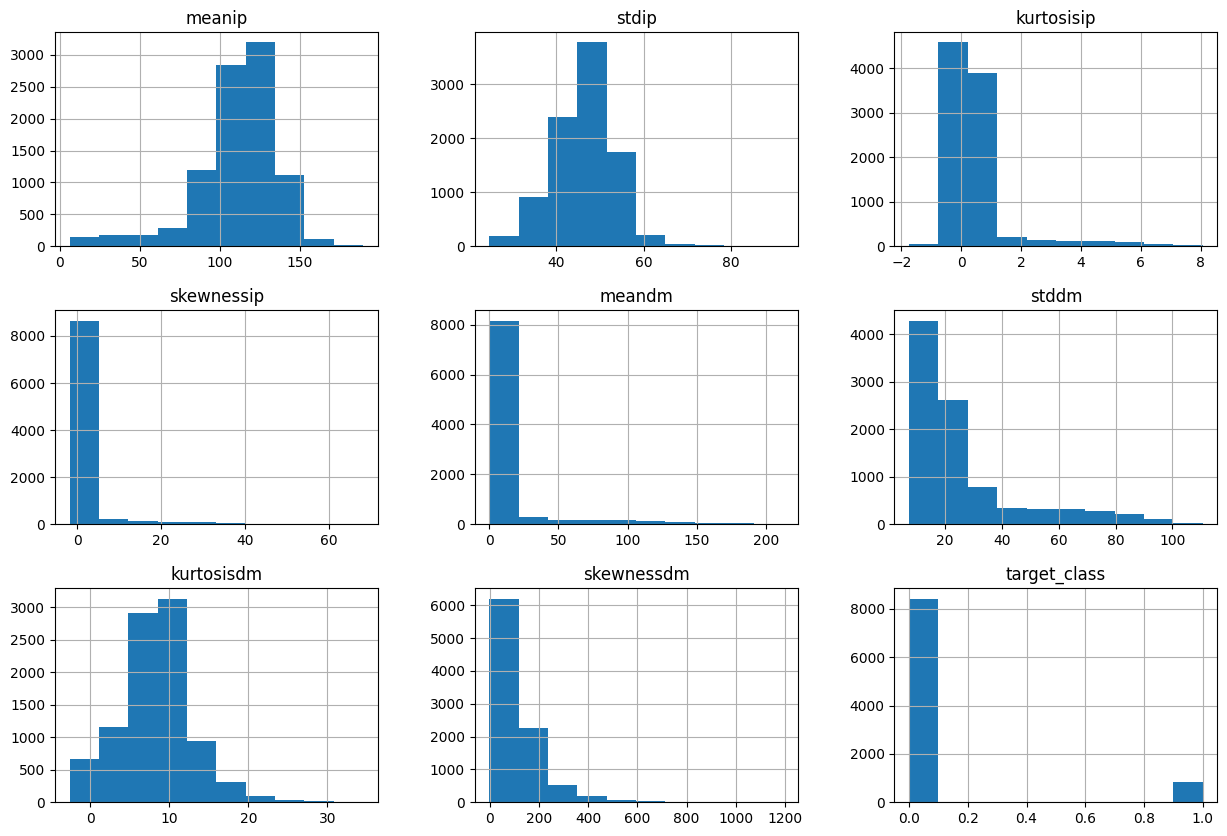

In [14]:
df.hist(figsize=(15, 10))

### 5. Split data into separate training and test set 

In [15]:
X = df.drop('target_class', axis=1)
y = df['target_class']

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

### 6. Feature Scaling

In [17]:
stdscaler = preprocessing.StandardScaler()
X_train = stdscaler.fit_transform(X_train)
X_test = stdscaler.transform(X_test)

In [18]:
C_values = [1.0, 100.0, 1000.0]

### 7. 
### Run SVM with default hyperparameters 
### Run SVM with rbf kernel and C=1.0 and gamma=auto 
### Run SVM with rbf kernel and C=100.0
### Run SVM with rbf kernel and C=1000.0
### 11. Compare the train-set and test-set accuracy
### 12. Check for overfitting and underfitting
### 13. visualize confusion matrix with seaborn heatmap
### 14. Generate classification report 
### 15. Evaluate classification accuracy
### 16. Evaluate Classification error
### 17. Plot ROC Curve
### 18. Compute ROC AUC

train accuracy: 0.9799722692959483
test accuracy: 0.9748382458662832
no underfitting or overfitting

confusion matrix: 
[[2503   15]
 [  55  209]]


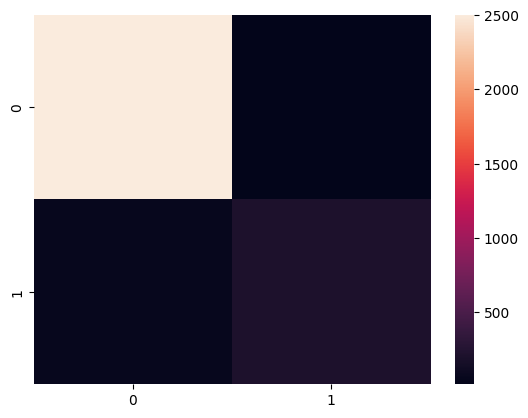

classification report: 
              precision    recall  f1-score   support

         0.0       0.98      0.99      0.99      2518
         1.0       0.93      0.79      0.86       264

    accuracy                           0.97      2782
   macro avg       0.96      0.89      0.92      2782
weighted avg       0.97      0.97      0.97      2782


classification accuracy: 0.9748382458662832
classification error: 0.025161754133716796


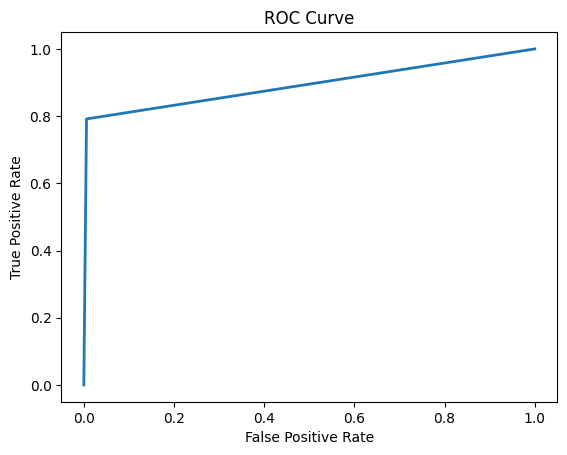

ROC AUC : 0.8929




train accuracy: 0.9845940533045756
test accuracy: 0.9784327821711
no underfitting or overfitting

confusion matrix: 
[[2507   11]
 [  49  215]]


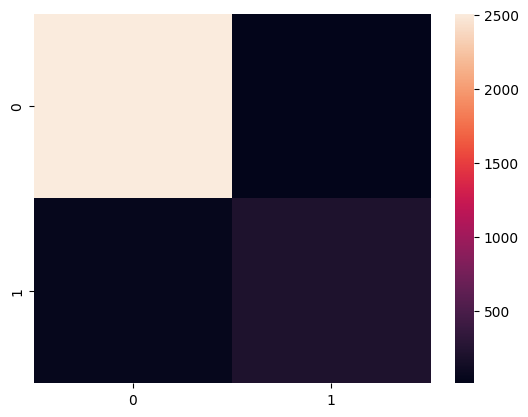

classification report: 
              precision    recall  f1-score   support

         0.0       0.98      1.00      0.99      2518
         1.0       0.95      0.81      0.88       264

    accuracy                           0.98      2782
   macro avg       0.97      0.91      0.93      2782
weighted avg       0.98      0.98      0.98      2782


classification accuracy: 0.9784327821711
classification error: 0.02156721782890003


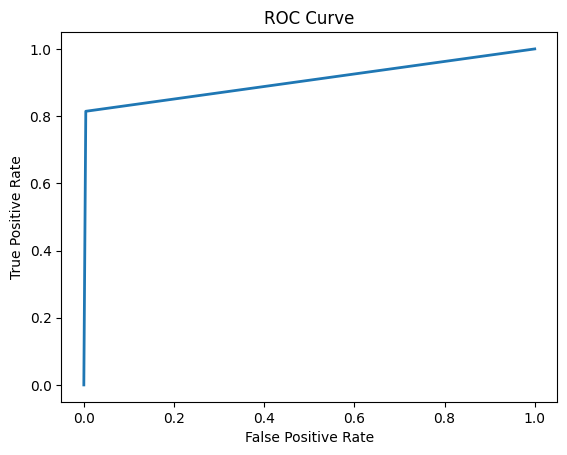

ROC AUC : 0.9050




train accuracy: 0.9879833615775689
test accuracy: 0.9759166067577283
no underfitting or overfitting

confusion matrix: 
[[2505   13]
 [  54  210]]


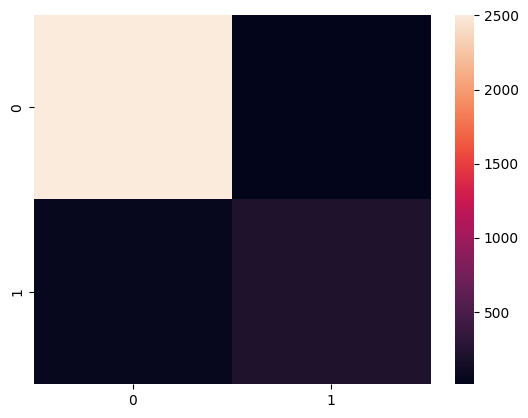

classification report: 
              precision    recall  f1-score   support

         0.0       0.98      0.99      0.99      2518
         1.0       0.94      0.80      0.86       264

    accuracy                           0.98      2782
   macro avg       0.96      0.90      0.92      2782
weighted avg       0.98      0.98      0.98      2782


classification accuracy: 0.9759166067577283
classification error: 0.02408339324227171


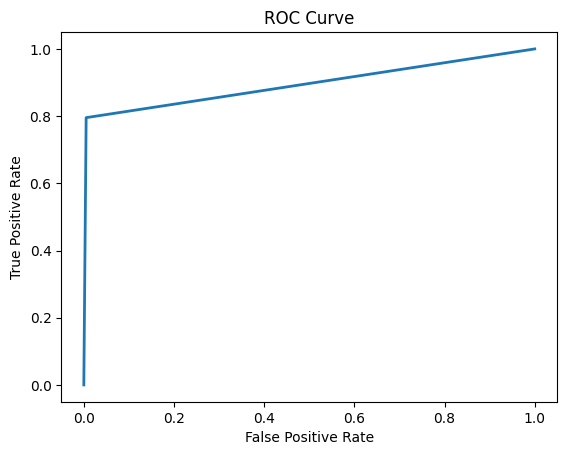

ROC AUC : 0.8951






In [19]:
for C in C_values:
    clf = svm.SVC(kernel='rbf', C=C)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_train)
    print(f'train accuracy: {accuracy_score(y_train, y_pred)}')
    y_pred = clf.predict(X_test)
    print(f'test accuracy: {accuracy_score(y_test, y_pred)}')
    print('no underfitting or overfitting\n')
    print(f'confusion matrix: \n{confusion_matrix(y_test, y_pred)}')
    sns.heatmap(confusion_matrix(y_test, y_pred))
    plt.show()
    print(f'classification report: \n{classification_report(y_test, y_pred)}\n')
    print(f'classification accuracy: {accuracy_score(y_test, y_pred)}')
    print(f'classification error: {1-accuracy_score(y_test, y_pred)}')
    fpr, tpr, thresholds = roc_curve(y_test, y_pred)
    plt.plot(fpr, tpr, linewidth=2)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.show()
    ROC_AUC = roc_auc_score(y_test, y_pred)
    print('ROC AUC : {:.4f}'.format(ROC_AUC))
    print('\n\n\n')

### 8. 
### Run SVM with linear kernel
### Run SVM with linear kernel and C=1.0
### Run SVM with linear kernel and C=100.0
### Run SVM with linear kernel and C=1000.0
### 11. Compare the train-set and test-set accuracy
### 12. Check for overfitting and underfitting
### 13. visualize confusion matrix with seaborn heatmap
### 14. Generate classification report 
### 15. Evaluate classification accuracy
### 16. Evaluate Classification error
### 17. Plot ROC Curve
### 18. Compute ROC AUC

train accuracy: 0.9790479124942227
test accuracy: 0.9769949676491733
no underfitting or overfitting

confusion matrix: 
[[2506   12]
 [  52  212]]


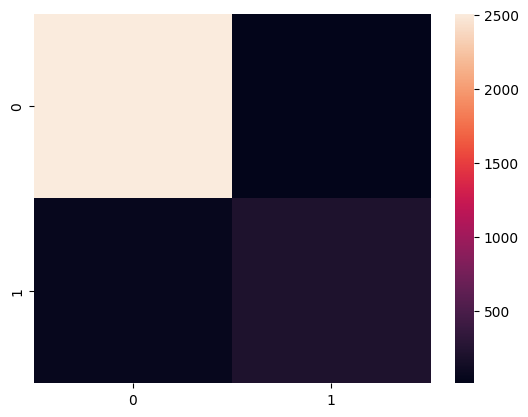

classification report: 
              precision    recall  f1-score   support

         0.0       0.98      1.00      0.99      2518
         1.0       0.95      0.80      0.87       264

    accuracy                           0.98      2782
   macro avg       0.96      0.90      0.93      2782
weighted avg       0.98      0.98      0.98      2782


classification accuracy: 0.9769949676491733
classification error: 0.023005032350826737


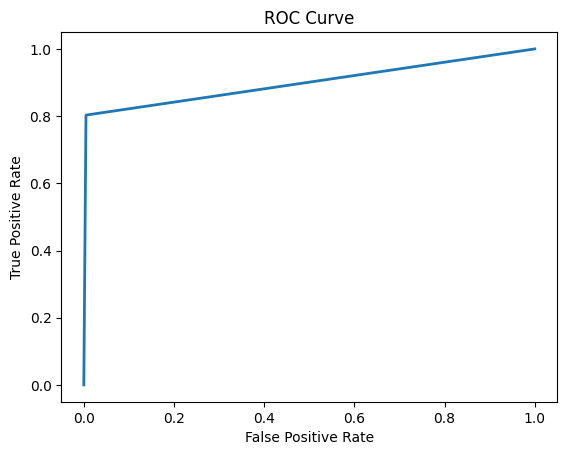

ROC AUC : 0.8991




train accuracy: 0.9793560314281312
test accuracy: 0.9769949676491733
no underfitting or overfitting

confusion matrix: 
[[2505   13]
 [  51  213]]


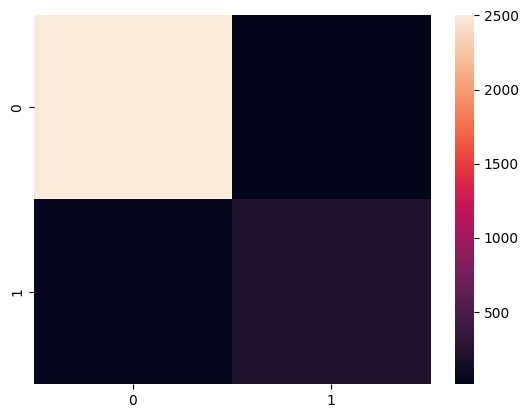

classification report: 
              precision    recall  f1-score   support

         0.0       0.98      0.99      0.99      2518
         1.0       0.94      0.81      0.87       264

    accuracy                           0.98      2782
   macro avg       0.96      0.90      0.93      2782
weighted avg       0.98      0.98      0.98      2782


classification accuracy: 0.9769949676491733
classification error: 0.023005032350826737


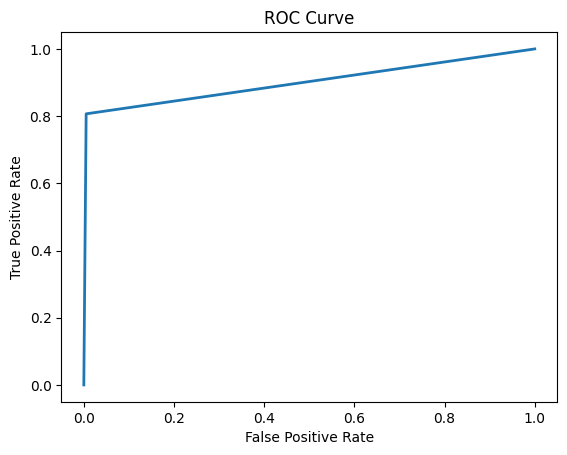

ROC AUC : 0.9008




train accuracy: 0.9793560314281312
test accuracy: 0.9769949676491733
no underfitting or overfitting

confusion matrix: 
[[2505   13]
 [  51  213]]


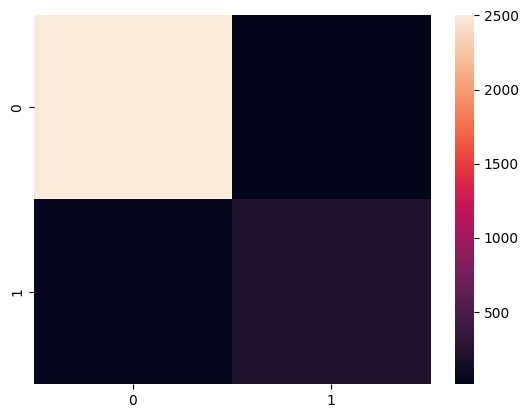

classification report: 
              precision    recall  f1-score   support

         0.0       0.98      0.99      0.99      2518
         1.0       0.94      0.81      0.87       264

    accuracy                           0.98      2782
   macro avg       0.96      0.90      0.93      2782
weighted avg       0.98      0.98      0.98      2782


classification accuracy: 0.9769949676491733
classification error: 0.023005032350826737


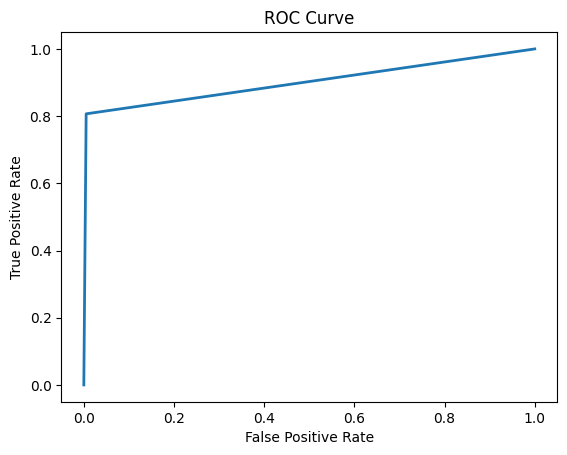

ROC AUC : 0.9008






In [20]:
for C in C_values:
    clf = svm.SVC(kernel='linear', C=C)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_train)
    print(f'train accuracy: {accuracy_score(y_train, y_pred)}')
    y_pred = clf.predict(X_test)
    print(f'test accuracy: {accuracy_score(y_test, y_pred)}')
    print('no underfitting or overfitting\n')
    print(f'confusion matrix: \n{confusion_matrix(y_test, y_pred)}')
    sns.heatmap(confusion_matrix(y_test, y_pred))
    plt.show()
    print(f'classification report: \n{classification_report(y_test, y_pred)}\n')
    print(f'classification accuracy: {accuracy_score(y_test, y_pred)}')
    print(f'classification error: {1-accuracy_score(y_test, y_pred)}')
    fpr, tpr, thresholds = roc_curve(y_test, y_pred)
    plt.plot(fpr, tpr, linewidth=2)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.show()
    ROC_AUC = roc_auc_score(y_test, y_pred)
    print('ROC AUC : {:.4f}'.format(ROC_AUC))
    print('\n\n\n')

### 9. 
### Run SVM with polynomial kernel 
### Run SVM with poly kernel and C=1.0 and gamma=auto 
### Run SVM with poly kernel and C=100.0
### Run SVM with poly kernel and C=1000.0
### 11. Compare the train-set and test-set accuracy
### 12. Check for overfitting and underfitting
### 13. visualize confusion matrix with seaborn heatmap
### 14. Generate classification report 
### 15. Evaluate classification accuracy
### 16. Evaluate Classification error
### 17. Plot ROC Curve
### 18. Compute ROC AUC

train accuracy: 0.9778154367585888
test accuracy: 0.9737598849748382
no underfitting or overfitting

confusion matrix: 
[[2507   11]
 [  62  202]]


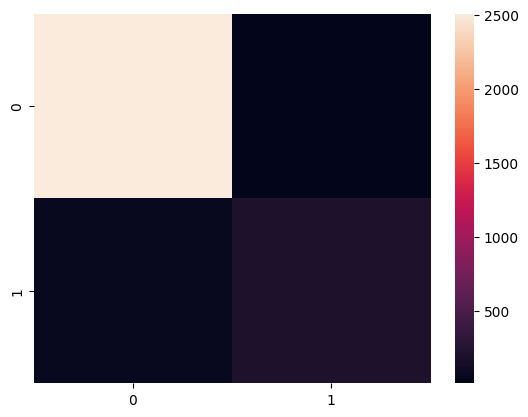

classification report: 
              precision    recall  f1-score   support

         0.0       0.98      1.00      0.99      2518
         1.0       0.95      0.77      0.85       264

    accuracy                           0.97      2782
   macro avg       0.96      0.88      0.92      2782
weighted avg       0.97      0.97      0.97      2782


classification accuracy: 0.9737598849748382
classification error: 0.02624011502516177


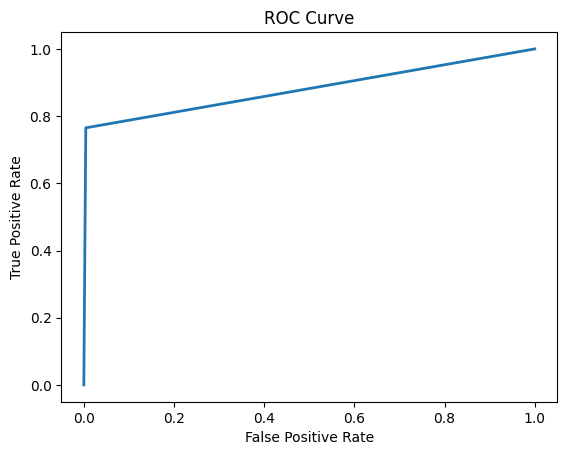

ROC AUC : 0.8804




train accuracy: 0.9818209828993991
test accuracy: 0.9730409777138749
no underfitting or overfitting

confusion matrix: 
[[2502   16]
 [  59  205]]


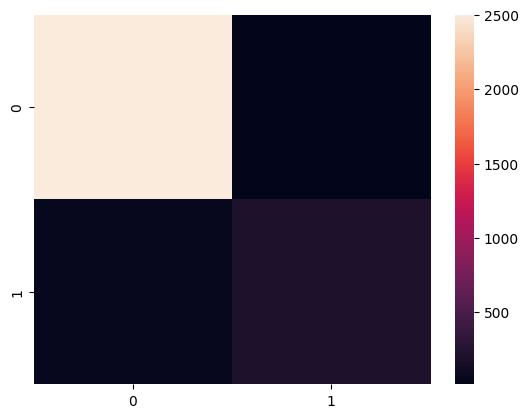

classification report: 
              precision    recall  f1-score   support

         0.0       0.98      0.99      0.99      2518
         1.0       0.93      0.78      0.85       264

    accuracy                           0.97      2782
   macro avg       0.95      0.89      0.92      2782
weighted avg       0.97      0.97      0.97      2782


classification accuracy: 0.9730409777138749
classification error: 0.026959022286125123


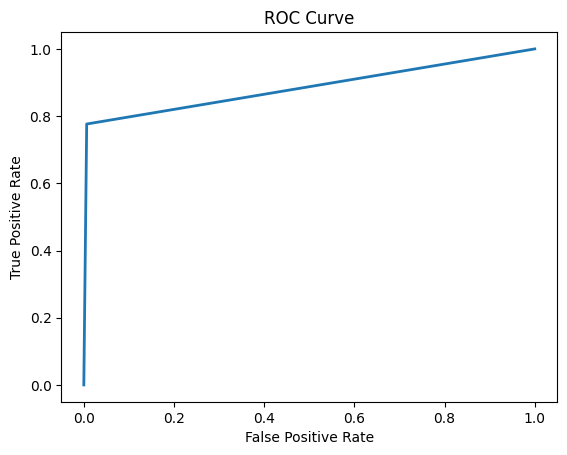

ROC AUC : 0.8851




train accuracy: 0.9827453397011247
test accuracy: 0.9759166067577283
no underfitting or overfitting

confusion matrix: 
[[2502   16]
 [  51  213]]


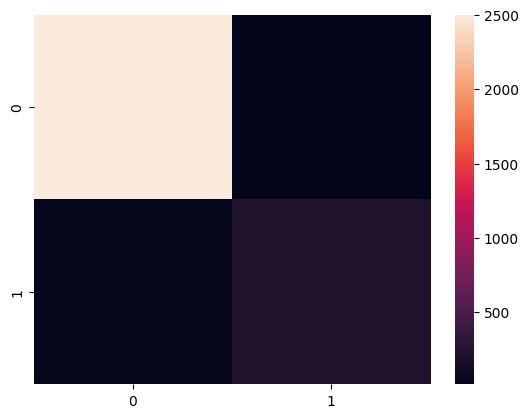

classification report: 
              precision    recall  f1-score   support

         0.0       0.98      0.99      0.99      2518
         1.0       0.93      0.81      0.86       264

    accuracy                           0.98      2782
   macro avg       0.96      0.90      0.93      2782
weighted avg       0.98      0.98      0.98      2782


classification accuracy: 0.9759166067577283
classification error: 0.02408339324227171


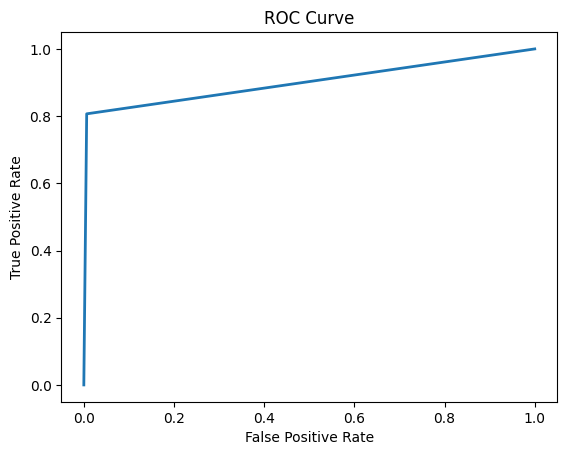

ROC AUC : 0.9002






In [21]:
for C in C_values:
    clf = svm.SVC(kernel='poly', C=C)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_train)
    print(f'train accuracy: {accuracy_score(y_train, y_pred)}')
    y_pred = clf.predict(X_test)
    print(f'test accuracy: {accuracy_score(y_test, y_pred)}')
    print('no underfitting or overfitting\n')
    print(f'confusion matrix: \n{confusion_matrix(y_test, y_pred)}')
    sns.heatmap(confusion_matrix(y_test, y_pred))
    plt.show()
    print(f'classification report: \n{classification_report(y_test, y_pred)}\n')
    print(f'classification accuracy: {accuracy_score(y_test, y_pred)}')
    print(f'classification error: {1-accuracy_score(y_test, y_pred)}')
    fpr, tpr, thresholds = roc_curve(y_test, y_pred)
    plt.plot(fpr, tpr, linewidth=2)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.show()
    ROC_AUC = roc_auc_score(y_test, y_pred)
    print('ROC AUC : {:.4f}'.format(ROC_AUC))
    print('\n\n\n')

### 10. 
### Run SVM with sigmoid kernel
### Run SVM with sigmoid kernel and C=1.0 and gamma=auto 
### Run SVM with sigmoid kernel and C=100.0
### Run SVM with sigmoid kernel and C=1000.0
### 11. Compare the train-set and test-set accuracy
### 12. Check for overfitting and underfitting
### 13. visualize confusion matrix with seaborn heatmap
### 14. Generate classification report 
### 15. Evaluate classification accuracy
### 16. Evaluate Classification error
### 17. Plot ROC Curve
### 18. Compute ROC AUC

train accuracy: 0.8687413341549838
test accuracy: 0.8752695902228612
no underfitting or overfitting

confusion matrix: 
[[2352  166]
 [ 181   83]]


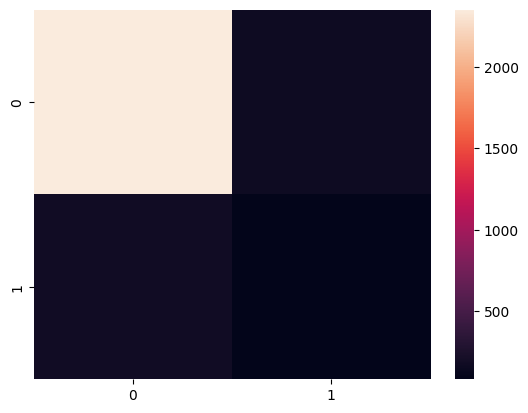

classification report: 
              precision    recall  f1-score   support

         0.0       0.93      0.93      0.93      2518
         1.0       0.33      0.31      0.32       264

    accuracy                           0.88      2782
   macro avg       0.63      0.62      0.63      2782
weighted avg       0.87      0.88      0.87      2782


classification accuracy: 0.8752695902228612
classification error: 0.12473040977713878


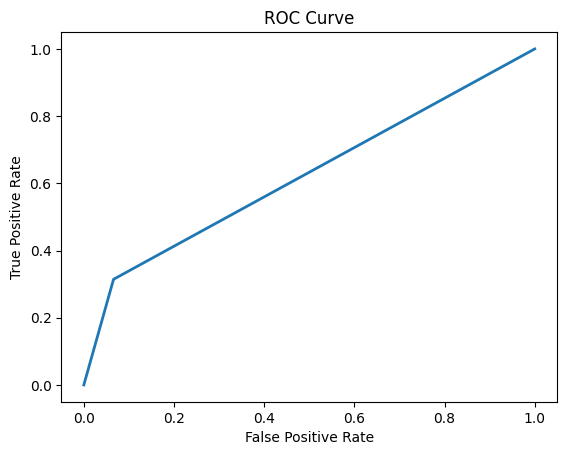

ROC AUC : 0.6242




train accuracy: 0.8684332152210753
test accuracy: 0.8745506829618979
no underfitting or overfitting

confusion matrix: 
[[2351  167]
 [ 182   82]]


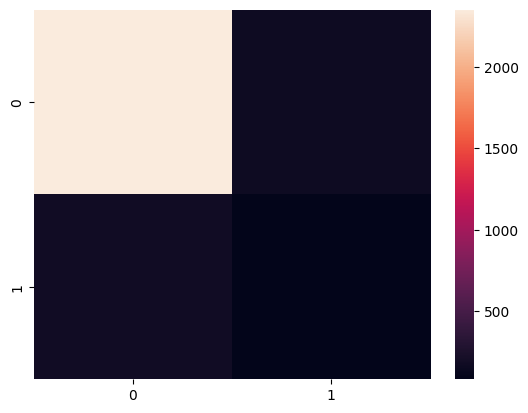

classification report: 
              precision    recall  f1-score   support

         0.0       0.93      0.93      0.93      2518
         1.0       0.33      0.31      0.32       264

    accuracy                           0.87      2782
   macro avg       0.63      0.62      0.63      2782
weighted avg       0.87      0.87      0.87      2782


classification accuracy: 0.8745506829618979
classification error: 0.12544931703810214


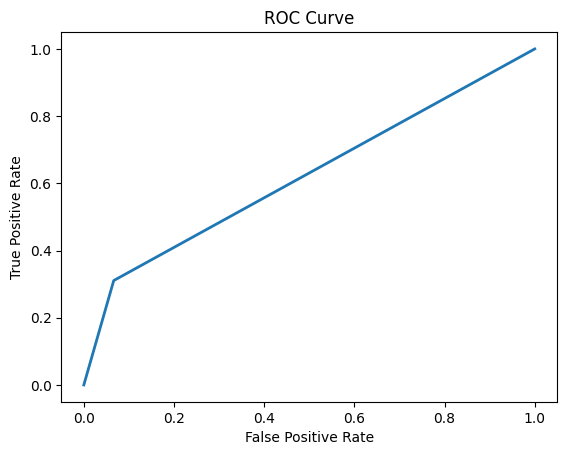

ROC AUC : 0.6221




train accuracy: 0.8684332152210753
test accuracy: 0.8745506829618979
no underfitting or overfitting

confusion matrix: 
[[2351  167]
 [ 182   82]]


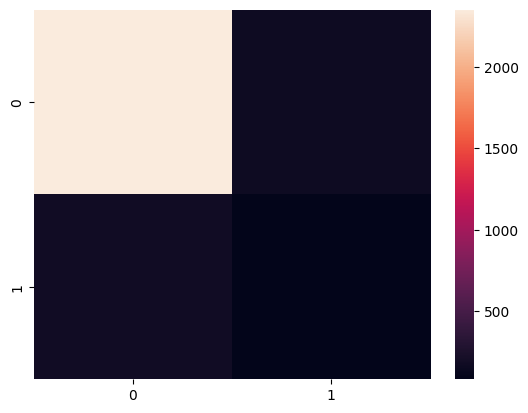

classification report: 
              precision    recall  f1-score   support

         0.0       0.93      0.93      0.93      2518
         1.0       0.33      0.31      0.32       264

    accuracy                           0.87      2782
   macro avg       0.63      0.62      0.63      2782
weighted avg       0.87      0.87      0.87      2782


classification accuracy: 0.8745506829618979
classification error: 0.12544931703810214


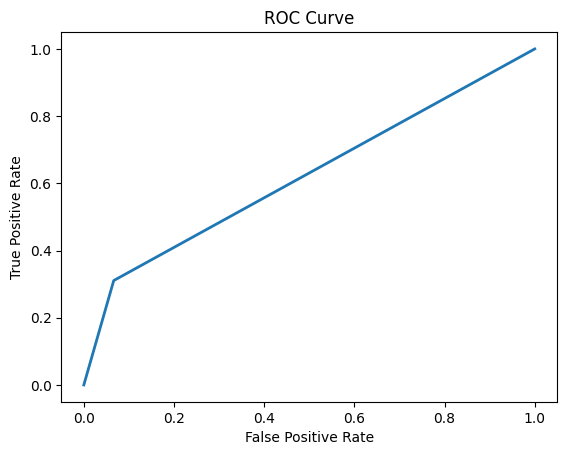

ROC AUC : 0.6221






In [22]:
for C in C_values:
    clf = svm.SVC(kernel='sigmoid', C=C)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_train)
    print(f'train accuracy: {accuracy_score(y_train, y_pred)}')
    y_pred = clf.predict(X_test)
    print(f'test accuracy: {accuracy_score(y_test, y_pred)}')
    print('no underfitting or overfitting\n')
    print(f'confusion matrix: \n{confusion_matrix(y_test, y_pred)}')
    sns.heatmap(confusion_matrix(y_test, y_pred))
    plt.show()
    print(f'classification report: \n{classification_report(y_test, y_pred)}\n')
    print(f'classification accuracy: {accuracy_score(y_test, y_pred)}')
    print(f'classification error: {1-accuracy_score(y_test, y_pred)}')
    fpr, tpr, thresholds = roc_curve(y_test, y_pred)
    plt.plot(fpr, tpr, linewidth=2)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.show()
    ROC_AUC = roc_auc_score(y_test, y_pred)
    print('ROC AUC : {:.4f}'.format(ROC_AUC))
    print('\n\n\n')

### 19. Stratified k-fold cross-validation with shuffle split with linear kernel

In [23]:
skf = StratifiedKFold(n_splits=3, shuffle=True, random_state=1)
linear_svc=svm.SVC(kernel='linear')
linear_scores = cross_val_score(linear_svc, X, y, cv=skf)
print(linear_scores)

[0.98091233 0.97961825 0.97573601]


### 21. Stratified k-fold cross-validation with shuffle split with rbf kernel

In [24]:
rbf_svc=svm.SVC(kernel='rbf')
rbf_scores = cross_val_score(rbf_svc, X, y, cv=skf)
print(rbf_scores)

[0.97411841 0.97379489 0.96894209]


### 22. Stratified k-fold cross-validation with shuffle split with polynomial kernel

In [25]:
poly_svc=svm.SVC(kernel='poly')
poly_scores = cross_val_score(poly_svc, X, y, cv=skf)
print(poly_scores)

[0.97411841 0.97250081 0.96829505]


### 23. Stratified k-fold cross-validation with shuffle split with sigmoid kernel

In [26]:
sig_svc=svm.SVC(kernel='sigmoid')
sig_scores = cross_val_score(sig_svc, X, y, cv=skf)
print(sig_scores)

[0.92623746 0.92882562 0.92785506]
